In [1]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
floders = os.listdir("charecter")
array = []
count = 0
for floder in floders:
    for i in range(0, 30):
        path = "charecter/" + floder + "/"+ str(i) +".png"
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        array.append(gray)
        count = count + 1


print("number of image: ", count)



number of image:  1440


In [3]:
#Label
label = []
countlabel = 0
for j in range(0, 48):
    for i in range(0, 30):
        label.append(i)
        countlabel = countlabel + 1

print("number of label: ", countlabel)

number of label:  1440


In [4]:
x = np.asarray(array)
y = np.asarray(label)

xTrain, xTest, yTrain, yTest = train_test_split(x, y , test_size = 0.2, random_state = 42)

print("X train: ", xTrain.shape)
print("y train: ", yTrain.shape)
print("X test: ", xTest.shape)
print("y test: ", yTest.shape)

xTain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

X train:  (1152, 32, 32)
y train:  (1152,)
X test:  (288, 32, 32)
y test:  (288,)


In [64]:
model = Sequential()
    # The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = (32,32,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(30, activation='softmax'))
model.summary()
# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_42 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 flatten_12 (Flatten)        (None, 10816)             0         
                                                                 
 dropout_19 (Dropout)        (None, 10816)             0         
                                                     

In [65]:
# Train the model
#no batch_size
model.fit(xTrain, yTrain, epochs=20)
model.evaluate(xTest, yTest)

Epoch 1/20
36/36 [==============================] - 4s 71ms/step - loss: 9.8376 - accuracy: 0.3038
Epoch 2/20
36/36 [==============================] - 3s 70ms/step - loss: 1.0361 - accuracy: 0.7613
Epoch 3/20
36/36 [==============================] - 2s 68ms/step - loss: 0.6119 - accuracy: 0.8507
Epoch 4/20
36/36 [==============================] - 2s 61ms/step - loss: 0.4641 - accuracy: 0.9028
Epoch 5/20
36/36 [==============================] - 2s 60ms/step - loss: 0.2285 - accuracy: 0.9349
Epoch 6/20
36/36 [==============================] - 2s 60ms/step - loss: 0.3186 - accuracy: 0.9418
Epoch 7/20
36/36 [==============================] - 2s 60ms/step - loss: 0.1688 - accuracy: 0.9609
Epoch 8/20
36/36 [==============================] - 2s 64ms/step - loss: 0.0819 - accuracy: 0.9800
Epoch 9/20
36/36 [==============================] - 2s 67ms/step - loss: 0.0765 - accuracy: 0.9783
Epoch 10/20
36/36 [==============================] - 2s 63ms/step - loss: 0.1014 - accuracy: 0.9783
Epoch 11/

[3.075798988342285, 0.9895833134651184]

In [66]:
predict = model.predict(xTest)


9/9 [==============================] - 0s 17ms/step


20


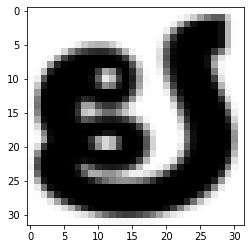

In [67]:
n = 190
print(np.argmax(predict[n]))
plt.imshow(xTest[n], cmap = 'gray')

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [68]:
#np.argmax(predict[0])
a = []

for i in predict:
    list(i)
    arg = np.argmax(i)
    a.append(arg)
print("accuracy: {}".format(accuracy_score(yTest, a)))

accuracy: 0.9895833333333334


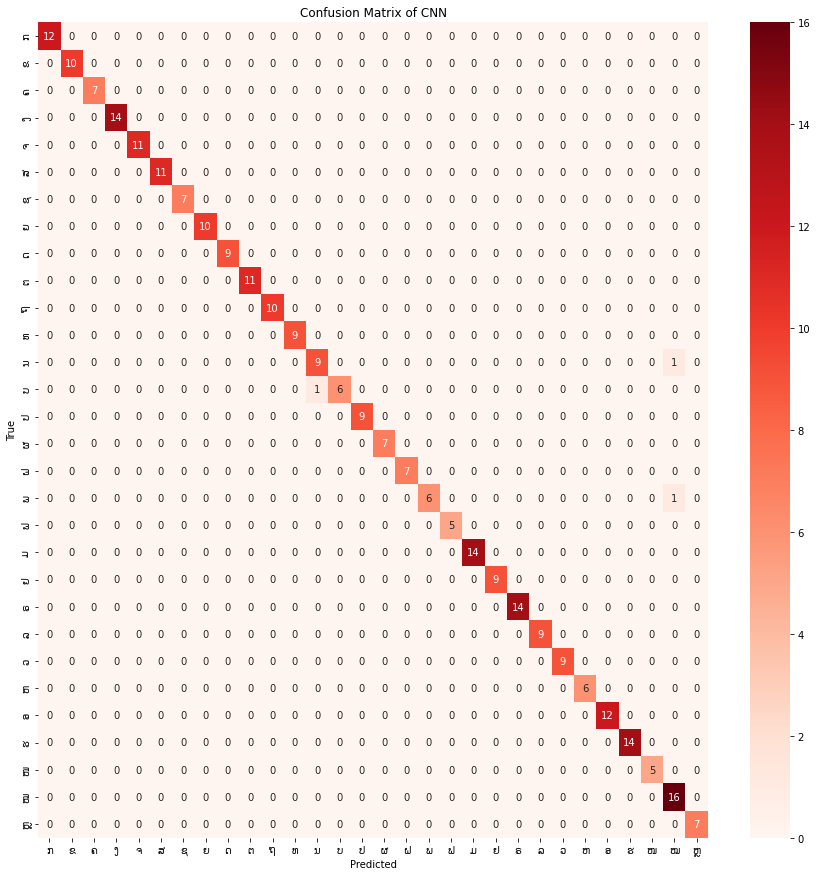

In [69]:
import seaborn as sns

confu = confusion_matrix(yTest, a)
la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ"]
conf_matrix = confu

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels= la, yticklabels = la, ax = ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of CNN")


plt.show()


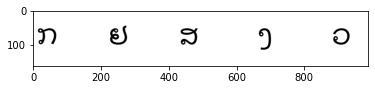

In [16]:
pimg  = cv2.imread("ex3.png")
pgray = cv2.cvtColor(pimg, cv2.COLOR_BGR2GRAY)
#gray = gray[:200][:200]
plt.imshow(pgray, cmap='gray')

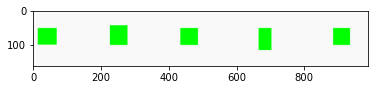

In [17]:
#ret, binary = cv2.threshold(gray, 180, 255, 0)
#plt.imshow(binary, cmap = 'gray')

pcanny = cv2.Canny(pimg, 50,200)
#ret, binary = cv2.threshold(gray, 180, 255, 0)
pconts, phierarchy = cv2.findContours(pcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
pimg2 = pimg.copy()

for pcont in pconts:
    px,py,pw,ph = cv2.boundingRect(pcont)
    cv2.rectangle(pimg2,(px,py),(px+pw,py+ph),(0,255,0),-1)


#imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray, 80, 200, 0)
pcan = cv2.Canny(pimg2, 20, 200)
pcontours, p_hierarchy = cv2.findContours(pcan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

pcrop = []
for pcnt in pcontours:
    px,py,pw,ph = cv2.boundingRect(pcnt)
    #cv2.rectangle(img,(x,y),(x+w+1,y+h+1),(0,255,0),1)
    ppic = list(pgray[py-1:py+ph+1,px-1:px+pw+1])
    pcrop.append(ppic)

plt.imshow(pimg2)

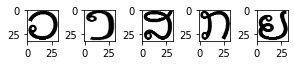

In [18]:
from skimage.transform import resize


crop32 = []
for i in pcrop:
    # Load the image array
    image = np.asarray(i)
    # Define the desired new shape
    new_shape = (32, 32)
    # Resize the image array
    new = resize(image, new_shape)
    crop32.append(list(new))


#plt.imshow(resized_image)
for i in range(int(len(crop32))):
    plt.subplot(6, 6, i+1)
    array = np.array(crop32[i])
    plt.imshow(array, cmap = 'gray')

plt.show()

In [19]:
data = np.asarray(crop32)
len(data)
pred = model.predict(data)
len(pred)

1/1 [==============================] - 0s 195ms/step


5

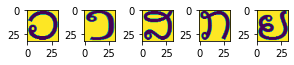

['ບ', 'ງ', 'ປ', 'ມ', 'ປ']
[13, 3, 14, 19, 14]


In [20]:
la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ"]
rlabel = []
re = []
for j in pred:
    a = np.argmax(j)
    re.append(a)
    rlabel.append(la[a])

for i in range(int(len(crop32))):
    plt.subplot(6, 6, i+1)
    array = np.array(crop32[i])
    plt.imshow(array)

plt.show()

print(rlabel)
print(re)

In [70]:
model.save("model/ac9896")

INFO:tensorflow:Assets written to: model/ac9896\assets


INFO:tensorflow:Assets written to: model/ac9896\assets


accuracy: 0.9554317548746518


' matrix = plot_confusion_matrix(model, xTest, yTest, cmap = plt.cm.Reds)\nmatrix.ax_.set_title("Confusion Matrix", color = "write")\nplt.xlabel("Predict Label", color = "write")\nplt.ylabel("True Label", color = "write")\nplt.gcf().axes[0].tick_params(color = "write")\nplt.gcf().axes[1].tick_params(color = "write")\n#plt.gcf().set_size_inches(10, 6)\nplt.show() '

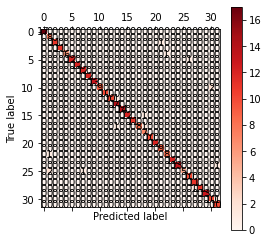

<Figure size 2160x2160 with 0 Axes>

In [ ]:
""" 
conf_matrix = confu

la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ", "ໆ", "ຯ"]

m = plt.matshow(conf_matrix, cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
#plt.xticks(x, la)
#plt.xticks(y, la)


# Add the value in each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.figure(figsize=(30, 30))
plt.show() """


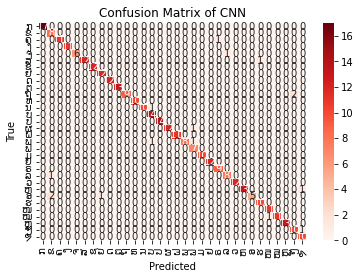

<Figure size 14400x14400 with 0 Axes>

INFO:tensorflow:Assets written to: model9554.model\assets


INFO:tensorflow:Assets written to: model9554.model\assets


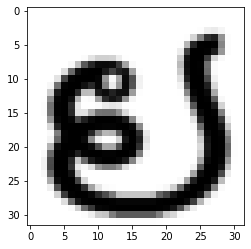

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_5/conv2d_10/Relu' defined at (most recent call last):
    File "c:\Users\HP\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\HP\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\HP\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\HP\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\HP\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\HP\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\HP\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\HP\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\HP\AppData\Local\Temp\ipykernel_5068\3828352024.py", line 1, in <cell line: 1>
      npre = model.predict(pic)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_5/conv2d_10/Relu'
input must be 4-dimensional[32,32]
	 [[{{node sequential_5/conv2d_10/Relu}}]] [Op:__inference_predict_function_32715]